In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm

Hypothesis

In [2]:
# Alpha for a two-tailed test
alpha = 1
alpha_tail = alpha / 2  # Divide by 2 for a two-tailed test

# Z-scores for a two-tailed test (alpha/2 in each tail)
z_score = stats.norm.ppf(1 - alpha_tail)  # 1 - alpha/2 gives the upper Z critical value

print("Z-score for alpha (two-tailed):", z_score)

Z-score for alpha (two-tailed): 0.0


In [3]:
import math
# Given data  z=x-u*sqrt(n)/s
# x =65 (sample mean)
# μ=70 (population mean)
# s=4 (sample standard deviation)
# n=50 (sample size)

sample_mean = 65
population_mean = 70
sample_std = 4
sample_size = 50
alpha = 0.05

# Calculate the test statistic (t-value)
Z_stat= (sample_mean - population_mean) / (sample_std / math.sqrt(sample_size))

# Output the results
print("statistic:", Z_stat)


statistic: -8.838834764831844


Hypothesis
H0: population average tip value is $2.75


In [4]:
df = pd.read_csv('../Datasets/tips.csv')
df.head()

total_bill   tip  gender smoker  day    time  size  price_per_person  \
0       16.99  1.01  Female     No  Sun  Dinner     2              8.49   
1       10.34  1.66    Male     No  Sun  Dinner     3              3.45   
2       21.01  3.50    Male     No  Sun  Dinner     3              7.00   
3       23.68  3.31    Male     No  Sun  Dinner     2             11.84   
4       24.59  3.61  Female     No  Sun  Dinner     4              6.15   

           Payer Name     CC Number Payment ID  
0  Christy Cunningham  3.560330e+15    Sun2959  
1      Douglas Tucker  4.478070e+15    Sun4608  
2      Travis Walters  6.011810e+15    Sun4458  
3    Nathaniel Harris  4.676140e+15    Sun5260  
4        Tonya Carter  4.832730e+15    Sun2251

In [5]:
tips = df['tip']

# mu_0 = 2.75
mu_0 = 2.98

In [6]:
#calculate sample statistics
sample_mean = tips.mean()
sample_std  = tips.std()
n = len(tips)
print(n)

244


In [7]:
#calculate the standard error
standard_error = (sample_std/np.sqrt(n))
z_stat1 = (sample_mean - mu_0)/standard_error

#determine critical z-values for alpha
alpha = 0.05
critical_two_tailed = norm.ppf(1 - alpha/2) # critical z for two-tailed test
critical_one_tailed = norm.ppf(1 - alpha)
p_value_two_tailed = 2 * (1 - norm.cdf(abs(z_stat1)))
p_value_one_tailed = 1 - norm.cdf(abs(z_stat1))

In [8]:
#Display results
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample std Dev: {sample_std:.2f}")
print(f"Z-static: {z_stat1:.2f}")
print(f"Critical Z (two-Talied):+/- {critical_two_tailed:.2f}")
print(f"Critical Z (one-Talied):+/- {critical_one_tailed:.2f}")
print(f"P value  (two-Talied): {p_value_two_tailed:.4f}")

Sample Mean: 3.00
Sample std Dev: 1.38
Z-static: 0.21
Critical Z (two-Talied):+/- 1.96
Critical Z (one-Talied):+/- 1.64
P value  (two-Talied): 0.8365


In [9]:
#Interpret results for two tailed test
if abs(z_stat1) >  critical_two_tailed:
    print("Reject the null hypothesis for two tailed test")
else:
    print("Fail to reject the null hypothesis for two tailed test")

Fail to reject the null hypothesis for two tailed test


In [10]:
#Interpret results for left one tailed test
if abs(z_stat1) <  critical_one_tailed:
    print("Reject the null hypothesis for left one tailed test")
else:
    print("Fail to reject the null hypothesis for left one tailed test")

Reject the null hypothesis for left one tailed test


In [11]:
#Interpret results for right one tailed test
if abs(z_stat1) >  critical_one_tailed:
    print("Reject the null hypothesis for right one tailed test")
else:
    print("Fail to reject the null hypothesis for right one tailed test")

Fail to reject the null hypothesis for right one tailed test


In [12]:
#Interpret results at alpha = 0.5
if p_value_two_tailed < alpha:
    print("Reject the null hypothesis for two tailed test")
else:
    print("Fail to reject the null hypothesis for two tailed test")

Fail to reject the null hypothesis for two tailed test


In [13]:
# #Interpret results at alpha = 0.5
# if p_value_one_tailed < alpha:
#     print("Reject the null hypothesis for two tailed test")
# else:
#     print("Fail to reject the null hypothesis for two tailed test")

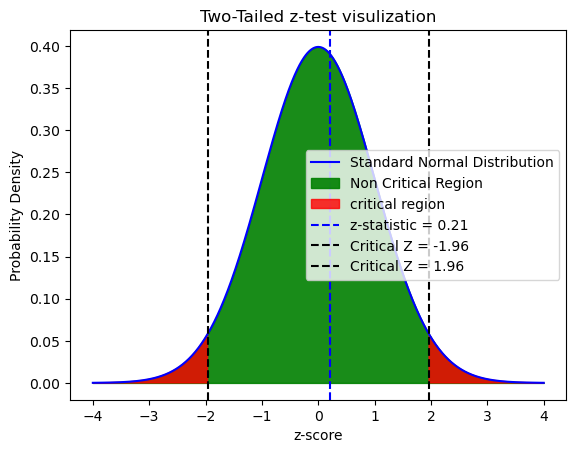

In [14]:
x = np.linspace(-4,4,1000)
y = norm.pdf(x)
plt.plot(x,y,label="Standard Normal Distribution",color='blue')

#critical regigions 
plt.fill_between(x,0,y,where=(x> -critical_two_tailed)|(x < critical_two_tailed),color='green',alpha=0.9,label='Non Critical Region')
plt.fill_between(x,0,y,where=(x<= -critical_two_tailed)|(x >= critical_two_tailed),color='red',alpha=0.8,label='critical region')

#mark z-statistics
plt.axvline(z_stat1,color='blue',linestyle='--',label=f'z-statistic = {z_stat1:.2f}')

#Annotate critical zvalue
plt.axvline(-critical_two_tailed,color='black',linestyle='--',label=f'Critical Z = {-critical_two_tailed:.2f}')
plt.axvline(critical_two_tailed,color='black',linestyle='--',label=f'Critical Z = {critical_two_tailed:.2f}')

plt.title("Two-Tailed z-test visulization")
plt.xlabel("z-score")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

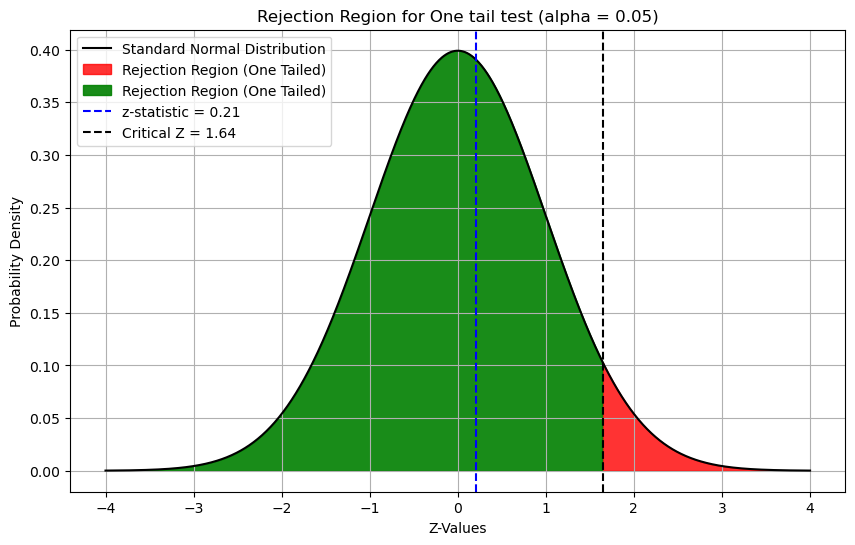

In [15]:
# plot rejection region for two tailed test
plt.figure(figsize=(10,6))
plt.plot(x,y,color='black',label='Standard Normal Distribution')
plt.fill_between(x,0,y,where=(x >= critical_one_tailed),color='red',alpha=0.8,label='Rejection Region (One Tailed)')

plt.fill_between(x,0,y,where=(x < critical_one_tailed),color='green',alpha=0.9,label='Rejection Region (One Tailed)')
plt.axvline(z_stat1,color='blue',linestyle='--',label=f'z-statistic = {z_stat1:.2f}')

plt.axvline(critical_one_tailed,color='black',linestyle='--',label=f'Critical Z = {critical_one_tailed:.2f}')
plt.xlabel('Z-Values')
plt.ylabel('Probability Density')
plt.title('Rejection Region for One tail test (alpha = 0.05)')
plt.legend()
plt.grid(True)
plt.show()

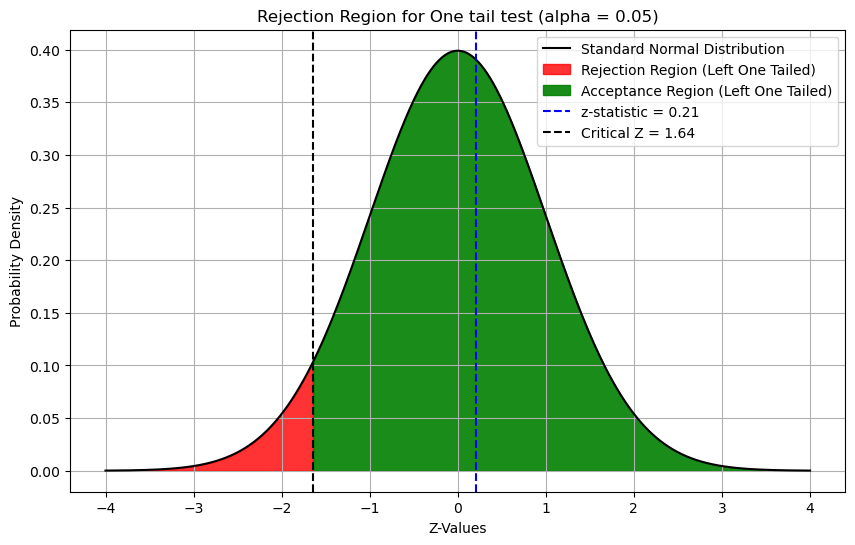

In [16]:
# plot rejection region for two tailed test
plt.figure(figsize=(10,6))
plt.plot(x,y,color='black',label='Standard Normal Distribution')
plt.fill_between(x,0,y,where=(x <= -critical_one_tailed),color='red',alpha=0.8,label='Rejection Region (Left One Tailed)')

plt.fill_between(x,0,y,where=(x > -critical_one_tailed),color='green',alpha=0.9,label='Acceptance Region (Left One Tailed)')
plt.axvline(z_stat1,color='blue',linestyle='--',label=f'z-statistic = {z_stat1:.2f}')

plt.axvline(-critical_one_tailed,color='black',linestyle='--',label=f'Critical Z = {critical_one_tailed:.2f}')
plt.xlabel('Z-Values')
plt.ylabel('Probability Density')
plt.title('Rejection Region for One tail test (alpha = 0.05)')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
titanic = pd.read_csv('../Datasets/tested.xls')
titanic.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

In [18]:
age = titanic['Age']

In [19]:
sample_mean = age.mean()
sample_std = age.std()
n = len(age)

In [20]:
mu_0 = 28
standard_error = (sample_std / (np.sqrt(n)))
z_stat = (sample_mean - mu_0)/standard_error

alpha = 0.05
z_stat_two_tailed = norm.ppf(1 - alpha/2)
p_value_tow_tailed = 2 * (1 - norm.cdf(abs(z_stat)))


In [21]:
#Display results
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample std Dev: {sample_std:.2f}")
print(f"Z-static: {z_stat:.2f}")
print(f"Critical Z (two-Talied):+/- {critical_two_tailed:.2f}")
print(f"P value  (two-Talied): {p_value_tow_tailed:}")

Sample Mean: 30.27
Sample std Dev: 14.18
Z-static: 3.28
Critical Z (two-Talied):+/- 1.96
P value  (two-Talied): 0.0010514201195495065


In [22]:
#Interpret results for two tailed test
if abs(z_stat) >  critical_two_tailed:
    print("Reject the null hypothesis for two tailed test")
else:
    print("Fail to reject the null hypothesis for two tailed test")

Reject the null hypothesis for two tailed test


In [23]:
#Interpret results at alpha = 0.5
if p_value_tow_tailed < alpha:
    print("Reject the null hypothesis for two tailed test")
else:
    print("Fail to reject the null hypothesis for two tailed test")

Reject the null hypothesis for two tailed test
